In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, f1_score, confusion_matrix, classification_report
from math import sqrt, pi
import seaborn as sns
import warnings

In [106]:
warnings.filterwarnings('ignore')
df = pd.read_csv('BankNoteAuthentication.csv')

In [107]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
variance,1372.0,0.433735,2.842763,-7.0421,-1.773000,0.49618,2.821475,6.8248
skewness,1372.0,1.922353,5.869047,-13.7731,-1.708200,2.31965,6.814625,12.9516
curtosis,1372.0,1.397627,4.310030,-5.2861,-1.574975,0.61663,3.179250,17.9274
entropy,1372.0,-1.191657,2.101013,-8.5482,-2.413450,-0.58665,0.394810,2.4495
class,1372.0,0.444606,0.497103,0.0000,0.000000,0.00000,1.000000,1.0000


In [108]:
target_column = ['class']

#KICK THE CLASS COLUMN BEFORE NORMALIZATION
predictors = list(set(list(df.columns))-set(target_column)) 
#NORMALIZE THE COLUMNS
df[predictors] = df[predictors]/df[predictors].max()

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
variance,1372.0,0.063553,0.416534,-1.031840,-0.259788,0.072702,0.413415,1.0
skewness,1372.0,0.148426,0.453152,-1.063428,-0.131891,0.179101,0.526161,1.0
curtosis,1372.0,0.077960,0.240416,-0.294861,-0.087853,0.034396,0.177340,1.0
entropy,1372.0,-0.486490,0.857731,-3.489773,-0.985283,-0.239498,0.161180,1.0
class,1372.0,0.444606,0.497103,0.000000,0.000000,0.000000,1.000000,1.0


In [109]:
X = df[predictors].values
Y = df[target_column].values

#Training set = %70 of the dataset
#Test set = %30 of the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, train_size = 0.7, random_state = 40)


#Check correlation between feature columns
print(df[['variance', 'skewness', 'curtosis', 'entropy']].corr()[:][:])

          variance  skewness  curtosis   entropy
variance  1.000000  0.264026 -0.380850  0.276817
skewness  0.264026  1.000000 -0.786895 -0.526321
curtosis -0.380850 -0.786895  1.000000  0.318841
entropy   0.276817 -0.526321  0.318841  1.000000


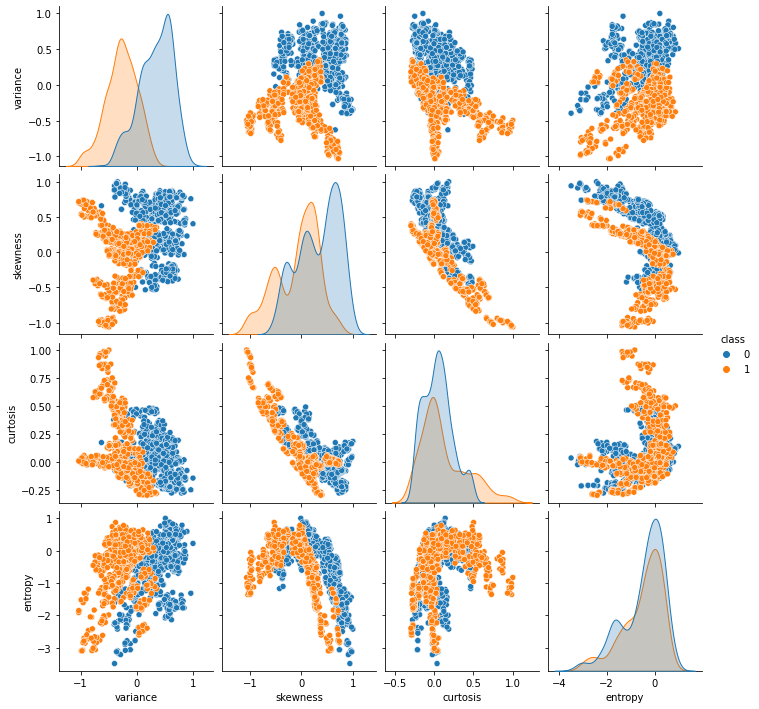

In [122]:
#Plotting correlation
plot = sns.pairplot(df,hue ="class")

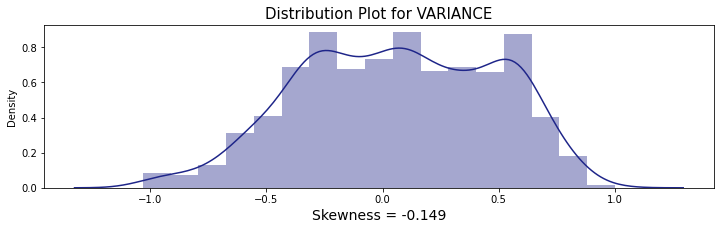

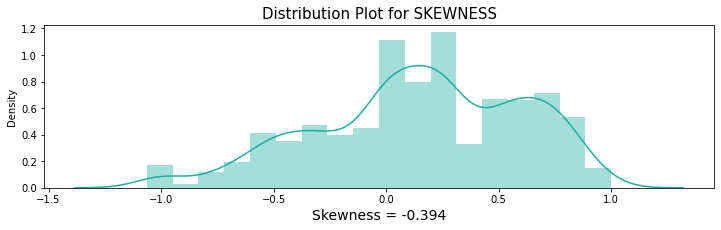

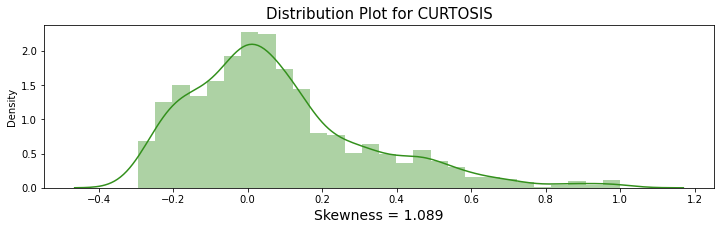

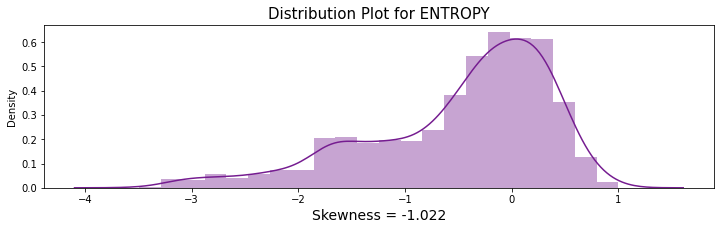

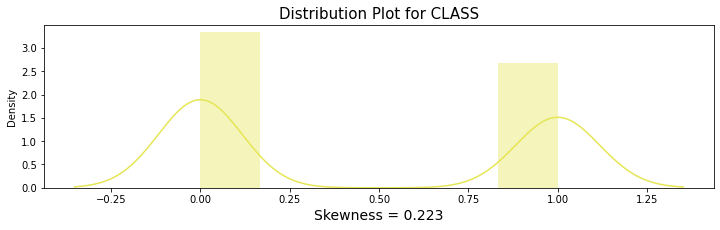

In [131]:
#Plotting skewness for better understanding on the dataset
colors=['#1E2589', '#1DAE9F',  '#33901C', '#751C90', '#E5E555']
colorPalette = 0
while colorPalette < 5:
    for column in df.columns:
        plt.figure(figsize=(12,3))
        sns.distplot(df[column], color = colors[colorPalette])
        plt.title(f'Distribution Plot for {column.upper()}', fontsize=15)
        plt.xlabel(f'Skewness = {round(df[column].skew(),3)}', fontsize=14)
        plt.show()
        colorPalette+=1

In [138]:
mlp = MLPClassifier(hidden_layer_sizes=(4,4,4), activation='relu', solver='adam', max_iter=1000)
mlp.fit(X_train,Y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

In [143]:
print('Number of 0\'s in the Dataframe: '); print((df['class'].where(df['class']==0)).dropna().size)
print('Number of 1\'s in the Dataframe: '); print((df['class'].where(df['class']==1)).dropna().size)
print('Rows in the Dataset: ' + str(df.shape[0]))

Number of 0's in the Dataframe: 
762
Number of 1's in the Dataframe: 
610
Rows in the Dataset: 1372


In [134]:
print('Number of 0\'s in the Training Set: '); print(np.count_nonzero(Y_train == 0))
print('Number of 1\'s in the Training Set: '); print(np.count_nonzero(Y_train == 1))

Number of 0's in the Training Set: 
543
Number of 1's in the Training Set: 
417


In [135]:
print('Confusion Matrix of Train Set:'); print(confusion_matrix(Y_train, predict_train))
print('Classification Report of Train Set:'); print(classification_report(Y_train, predict_train))

Confusion Matrix of Train Set:
[[543   0]
 [  0 417]]
Classification Report of Train Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       543
           1       1.00      1.00      1.00       417

    accuracy                           1.00       960
   macro avg       1.00      1.00      1.00       960
weighted avg       1.00      1.00      1.00       960



In [136]:
print('Confusion Matrix of Test Set:'); print(confusion_matrix(Y_test,predict_test))
print('Classification Report of Test Set:'); print(classification_report(Y_test,predict_test))

Confusion Matrix of Test Set:
[[219   0]
 [  0 193]]
Classification Report of Test Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       219
           1       1.00      1.00      1.00       193

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412

